In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = {}

def importData(filename):

    f = open(filename, "r")
    temperature = float(f.readline().strip("Temperature "))
    df = pd.read_csv(filename, skiprows=1)
    return temperature, df

for i in range(15):
    temperature, df = importData("output/temperature_%s.csv" % i)
    data[temperature] = df



dict_keys([1000000000000000.0, 1e+20, 1e+21, 1e+22, 2.5e+22, 5e+22, 7.5e+22, 1e+23, 2.5e+23, 5e+23, 7.5e+23, 1e+24, 1e+25, 1e+26, 1e+27])


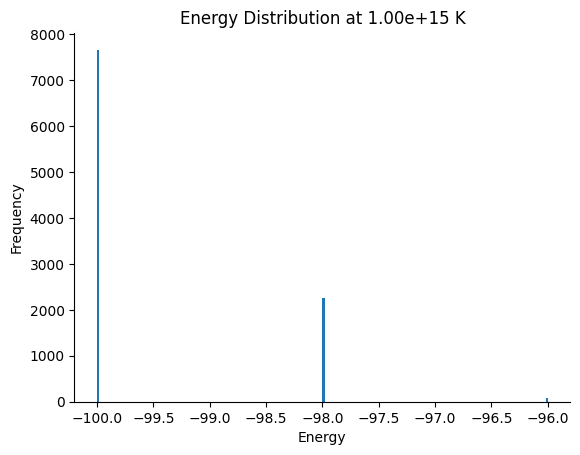

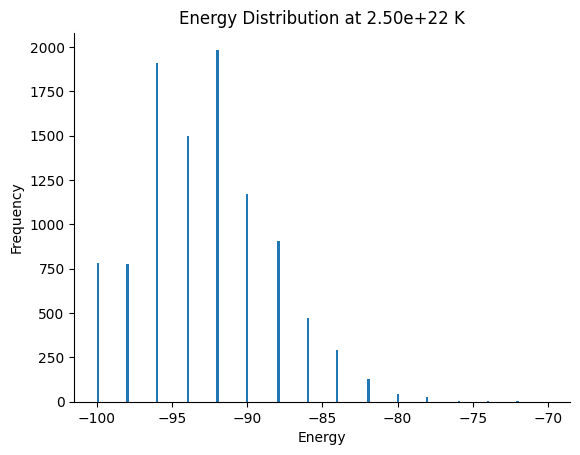

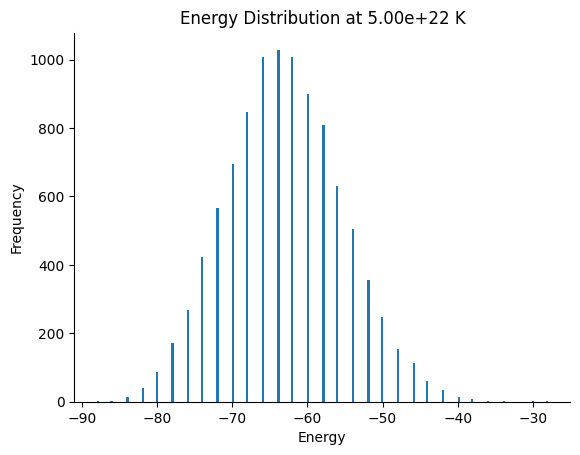

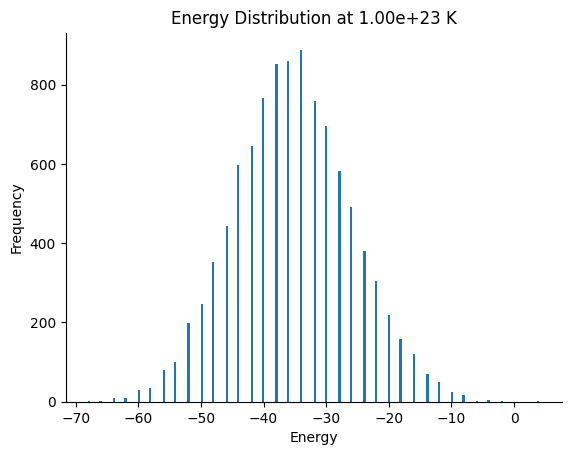

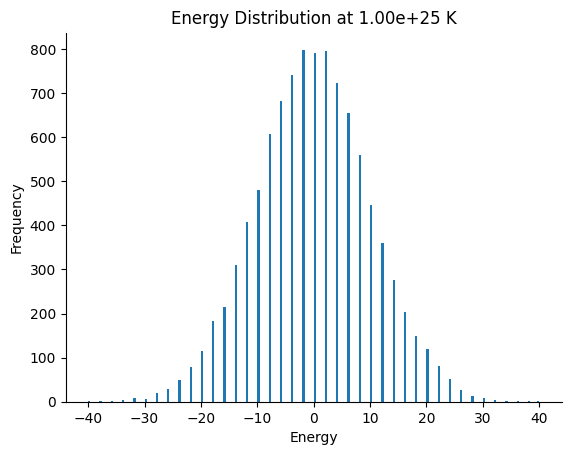

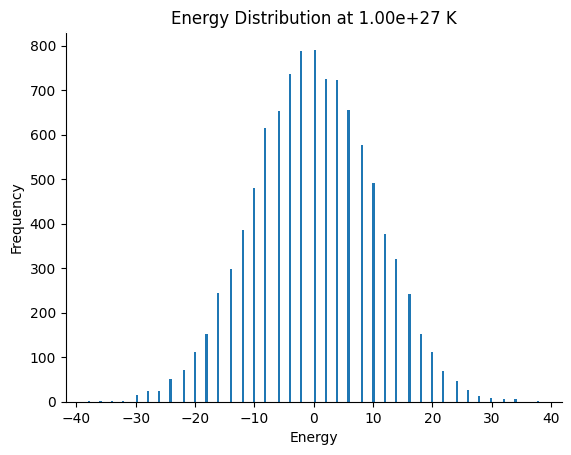

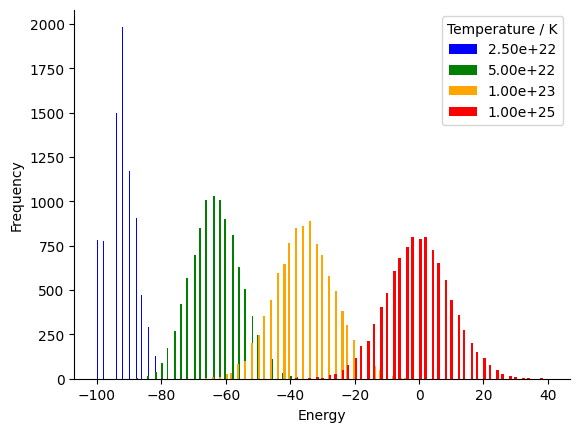

In [4]:
def plotEnergyHist(temperature):
    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["energy"], bins=200)
    ax.set_title(f"Energy Distribution at %s K" % "{:.2e}".format(temperature))
    ax.set_xlabel("Energy")
    ax.set_ylabel("Frequency")
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')
    return fig, ax

fig, ax = plotEnergyHist(1e15)
fig.savefig("images/Energy_Histogram_1D_1e15K")
fig, ax = plotEnergyHist(2.5e22)
fig.savefig("images/Energy_Histogram_1D_2_5e22K")
fig, ax = plotEnergyHist(5e22)
fig.savefig("images/Energy_Histogram_1D_5e22K")

plotEnergyHist(1e23)
plotEnergyHist(1e25)
fig, ax = plotEnergyHist(1e27)
fig.savefig("images/Energy_Histogram_1D_1e27K")

fig, ax = plt.subplots()

temperatures = [2.5e22, 5e22, 1e23, 1e25]
colors = ["blue", "green", "orange", "red"]

for t in range(len(temperatures)):
    temperature = temperatures[t]
    df = data[temperature]
    ax.hist(df["energy"], bins=100, label=f"%s" % "{:.2e}".format(temperature), color=colors[t])


ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
ax.legend(title="Temperature / K")
ax.set_ylabel("Frequency")
ax.set_xlabel("Energy")

fig.savefig("images/Energy_Histogram_Multiple_Temps_1D")
# ax.set_xlim(-120, 10)
    # ax.set_title(f"Energy Distribution at %s K" % "{:.2e}".format(temperature))


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Magnetism Distribution at 1.00e+25 K'}, xlabel='Magnetism', ylabel='Frequency'>)

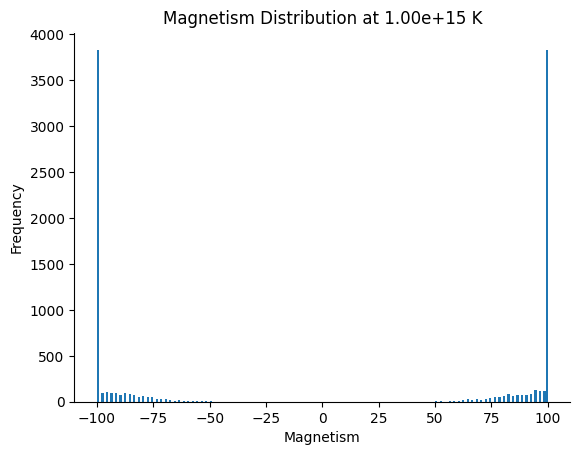

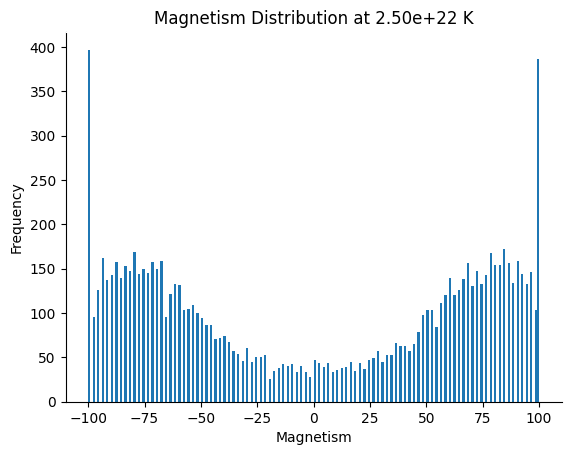

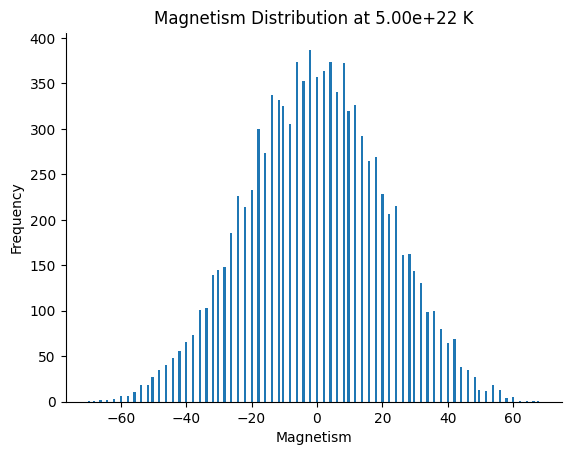

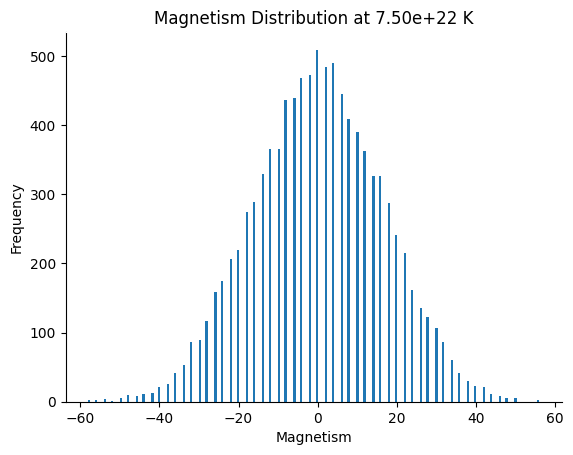

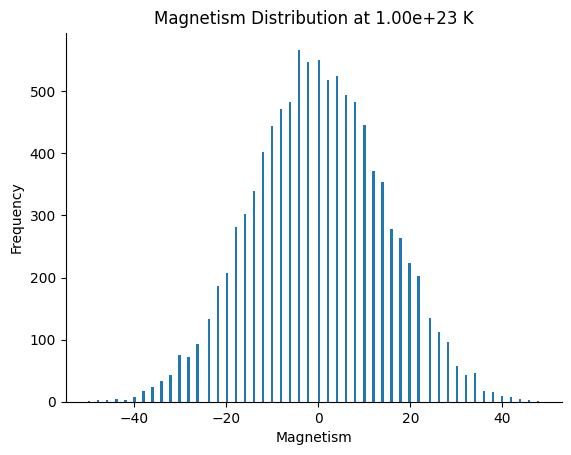

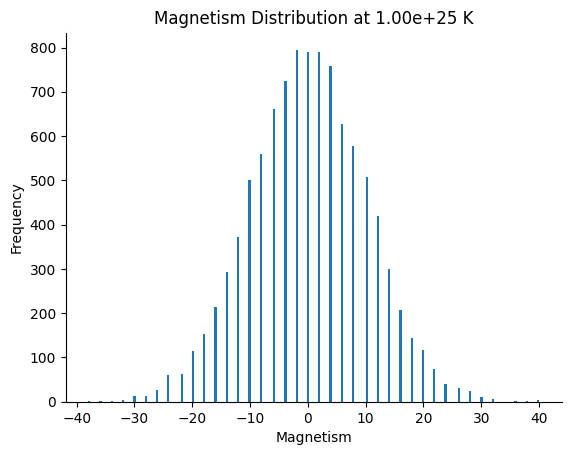

In [5]:
def plotMagnetismHist(temperature):
    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["magnetism"], bins=200)
    ax.set_title(f"Magnetism Distribution at %s K" % "{:.2e}".format(temperature))
    ax.set_xlabel("Magnetism")
    ax.set_ylabel("Frequency")
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')
    return fig, ax

fig, ax = plotMagnetismHist(1e15)
fig.savefig("images/Magnetism_Histogram_1D_1e15K")

fig, ax = plotMagnetismHist(2.5e22)
fig.savefig("images/Magnetism_Histogram_1D_2_5e22K")

fig, ax = plotMagnetismHist(5e22)
fig.savefig("images/Magnetism_Histogram_1D_5e22K")

plotMagnetismHist(7.5e22)

plotMagnetismHist(1e23)
plotMagnetismHist(1e25)



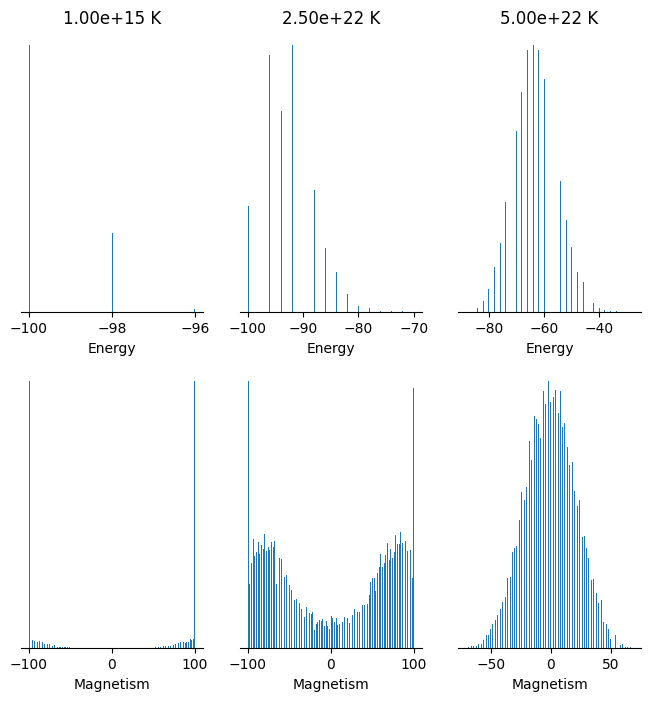

In [30]:

fig, axs = plt.subplots(2, 3, figsize=(8, 8))

temperatures = [1e15, 2.5e22, 5e22]

for t in range(len(temperatures)):
    temperature = temperatures[t]
    df = data[temperature]

    ax = axs[0, t]
    ax.hist(df["energy"], bins=200)
    ax.set_title(f"%s K" % "{:.2e}".format(temperature))
    ax.set_xlabel("Energy")
    # ax.set_ylabel("Frequency")
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')
    ax.spines['left'].set_color('#FFFFFF')

    ax.get_yaxis().set_visible(False)

    ax = axs[1, t]
    ax.hist(df["magnetism"], bins=200)
    # ax.set_title(f"Magnetism Distribution at %s K" % "{:.2e}".format(temperature))
    ax.set_xlabel("Magnetism")
    # ax.set_ylabel("Frequency")
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')
    ax.spines['left'].set_color('#FFFFFF')

    ax.get_yaxis().set_visible(False)

fig.savefig("images/Energy_Magentism_Comparison_1D")

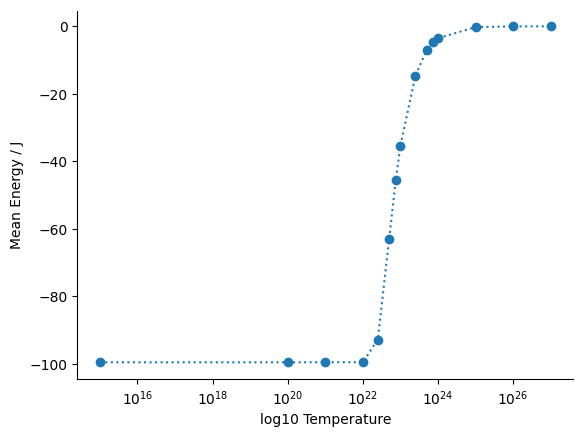

In [23]:
fig, ax = plt.subplots()

mean_energies = []

for temp in data.keys():
    mean_energies.append(data[temp]["energy"].mean())

ax.scatter(data.keys(), mean_energies)
ax.plot(data.keys(), mean_energies, ls="dotted")

ax.set_ylabel("Mean Energy / J")
ax.set_xlabel("log10 Temperature")
ax.set_xscale("log")
ax.spines['top'].set_color('#FFFFFF')
ax.spines['right'].set_color('#FFFFFF')
fig.savefig("images/Mean_Energy_Vs_Temperature.png")
